<a href="https://colab.research.google.com/github/KyoungwonLee/delete/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 필요한 라이브러리 호출
데이터 분석 및 시각화를 위해 다음 라이브러리를 호출:
- **pandas**: 데이터 조작 및 분석을 위한 라이브러리.
- **numpy**: 수치 계산 및 배열 연산을 위한 라이브러리.
- **matplotlib**: 데이터 시각화를 위한 기본 라이브러리.
- **seaborn**: 통계적 데이터 시각화를 위한 고급 라이브러리.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 파일 호출
- 데이터 파일: `lung_cancer.csv`
- 이 파일은 폐암 데이터셋으로, 분석을 위해 호출


### 데이터셋 기본 정보
- **데이터셋 이름**: `lung_cancer.csv`
- **주요 내용**: 폐암 관련 정보와 주요 변수들로 구성된 데이터셋.
- **포함된 속성**:
  - `GENDER`: 성별 (Male/Female)
  - `AGE`: 나이
  - `SMOKING`: 흡연 여부
  - `YELLOW_FINGERS`: 손가락이 노란색인지 여부
  - `ANXIETY`: 불안 여부
  - `CHRONIC_DISEASE`: 만성 질환 여부
  - `LUNG_CANCER`: 폐암 진단 여부 (Yes/No)
- **데이터셋 목적**: 폐암 발생 여부를 분석하고 예측 모델 개발.


In [ ]:
lung_data = pd.read_csv('lung_cancer.csv')
print(lung_data.head())
print('-'*80)
print(lung_data.info())
print('-'*80)
print(lung_data.isnull().sum())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   65        1               1        1              2   
1      F   55        1               2        2              1   
2      F   78        2               2        1              1   
3      M   60        2               1        1              1   
4      F   80        1               1        2              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                2        1        2         2                  2         2   
1                1        2        2         2                  1         1   
2                1        2        1         2                  1         1   
3                2        1        2         1                  1         2   
4                1        2        1         2                  1         1   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    2                      2           

---

### 통계치 확인
- **상관계수 (Correlation Matrix)**:
  - 각 원소는 두 변수 간의 상관관계를 나타냄.
  - **1에 가까울수록**: 두 변수 간 **양의 상관관계**가 강함.
  - **-1에 가까울수록**: 두 변수 간 **음의 상관관계**가 강함.
  - **0에 가까울수록**: 두 변수 간 상관관계가 거의 없음.


In [ ]:
stats = lung_data.describe()
print(stats)

print()
print("Value Counts for Categorical Attributes:")
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'LUNG_CANCER']

for column in categorical_columns:
    print(column)
    print(lung_data[column].value_counts())

correlation_matrix = lung_data.select_dtypes(include=['float', 'int']).corr()
print()
print("Correlation Matrix:")
print(correlation_matrix)

               AGE      SMOKING  YELLOW_FINGERS      ANXIETY  PEER_PRESSURE  \
count  3000.000000  3000.000000     3000.000000  3000.000000    3000.000000   
mean     55.169000     1.491000        1.514000     1.494000       1.499000   
std      14.723746     0.500002        0.499887     0.500047       0.500082   
min      30.000000     1.000000        1.000000     1.000000       1.000000   
25%      42.000000     1.000000        1.000000     1.000000       1.000000   
50%      55.000000     1.000000        2.000000     1.000000       1.000000   
75%      68.000000     2.000000        2.000000     2.000000       2.000000   
max      80.000000     2.000000        2.000000     2.000000       2.000000   

       CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count      3000.000000  3000.000000  3000.000000  3000.000000   
mean          1.509667     1.489667     1.506667     1.497333   
std           0.499990     0.499977     0.500039     0.500076   
min           1.000000     1

### 성별 및 흡연 여부에 따른 나이 분포 시각화
- **그래프 유형**: 상자 그림(Boxplot)
- **데이터**: `lung_data`
- **분석 축**:
  - `x`: 흡연 여부 (`SMOKING`, 1=흡연자, 2=비흡연자)
  - `y`: 나이 (`AGE`)
  - `hue`: 성별 (`GENDER`, M=남성, F=여성)
- **색상 팔레트**:
  - 남성(M): `skyblue`
  - 여성(F): `salmon`
- **그래프 제목**: `Age Distribution by Smoking Status and Gender`
- **목적**:
  - 성별과 흡연 상태에 따른 나이 분포를 비교하여 데이터의 패턴을 시각화.


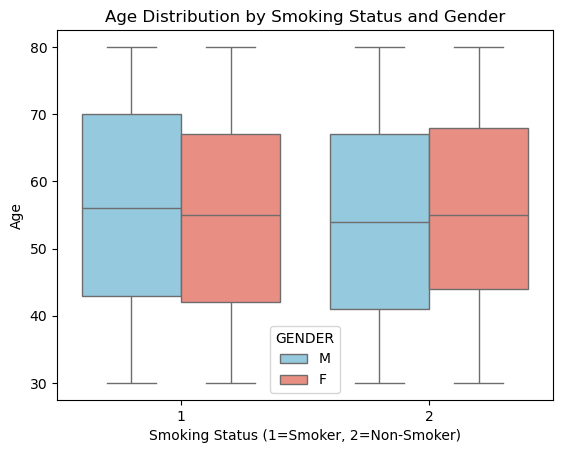

In [ ]:
sns.boxplot(data=lung_data, x='SMOKING', y='AGE', hue='GENDER', palette={'M' : 'skyblue', 'F' : 'salmon'})
plt.title('Age Distribution by Smoking Status and Gender')
plt.xlabel('Smoking Status (1=Smoker, 2=Non-Smoker)')
plt.ylabel('Age')
plt.show()


### 나이 분포 시각화
- **그래프 유형**: 히스토그램(Histogram)
- **데이터**: `lung_data`
- **분석 축**:
  - `x`: 나이(`AGE`)
  - `y`: 빈도수(Frequency)
- **그래프 설정**:
  - `bins=20`: 나이를 20개의 구간으로 나눔.
  - `color='salmon'`: 그래프 색상을 연한 붉은색으로 설정.
- **그래프 제목**: `Age Distribution`
- **목적**:
  - 데이터셋에서 나이의 분포를 시각화하여 특정 연령대의 데이터 밀도를 확인.


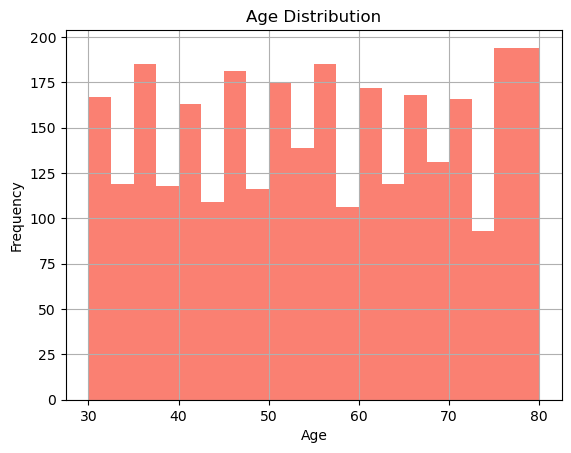

In [ ]:
lung_data['AGE'].hist(bins=20, color='salmon')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 음주 여부 및 성별에 따른 폐암 사례 시각화
- **분석 데이터**:
  - 데이터셋: `lung_data`
  - 축 기준:
    - `index='ALCOHOL_CONSUMING'`: 음주 여부 (1=음주자, 2=비음주자).
    - `columns='GENDER'`: 성별 (M=남성, F=여성).
    - `values='LUNG_CANCER'`: 폐암 진단 여부.
  - **집계 함수**: `aggfunc=lambda x: (x == 'YES').sum()`  
    - 폐암이 있는 사례(YES)의 개수를 집계.
- **결과 데이터**:
  - 음주 여부와 성별에 따른 폐암 발생 건수로 피벗 테이블 생성.
  - 인덱스를 `['Alcohol Consumer', 'Non-Alcohol Consumer']`로 변경.

- **그래프 설정**:
  - **그래프 유형**: 막대 그래프 (Bar plot).
  - **색상**:
    - 여성(Female): `salmon`.
    - 남성(Male): `skyblue`.
  - **크기**: `(8, 5)`로 설정.
  - **축 제목**:
    - X축: `Alcohol Consumption Status` (음주 상태).
    - Y축: `Number of Lung Cancer Cases` (폐암 사례 수).
  - **범례**:
    - `title='Gender'`: 범례 제목을 성별로 설정.
    - 라벨: `['Female', 'Male']`.

- **목적**:
  - 성별 및 음주 여부에 따른 폐암 발생 건수를 비교하여 데이터를 시각화.


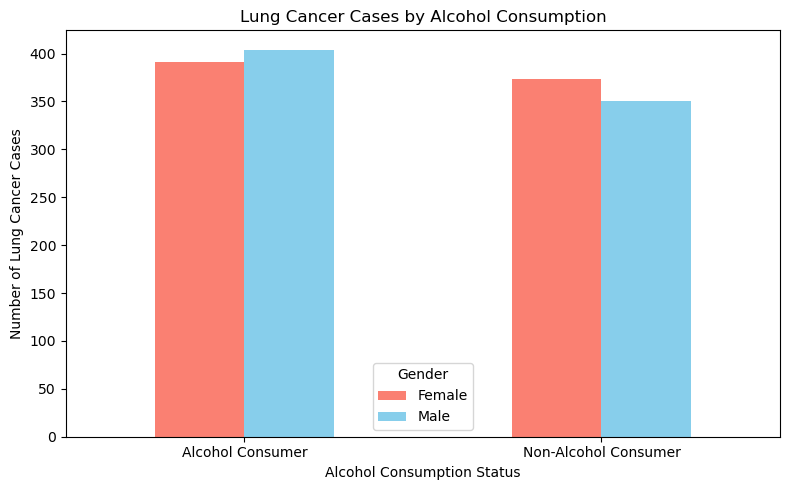

In [ ]:
alcohol_cancer = lung_data.pivot_table(
    index='ALCOHOL_CONSUMING',
    columns='GENDER',
    values='LUNG_CANCER',
    aggfunc=lambda x : (x == 'YES').sum()
)

alcohol_cancer.index = ['Alcohol Consumer', 'Non-Alcohol Consumer']

alcohol_cancer.plot(kind='bar', figsize=(8, 5), color=['salmon', 'skyblue'])

plt.title('Lung Cancer Cases by Alcohol Consumption')
plt.xlabel('Alcohol Consumption Status')
plt.ylabel('Number of Lung Cancer Cases')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 그래프 분석 결과
- **음주 및 흡연의 영향**:
  - **음주 또는 흡연을 한 경우**:
    - 남성(Male)의 폐암 발생 건수가 더 많음.
  - **음주 또는 흡연을 하지 않은 경우**:
    - 여성(Female)의 폐암 발생 건수가 더 많음.
- **결론**:
  - 성별에 따라 음주 및 흡연이 폐암 발생에 미치는 영향이 다를 가능성이 있음.
  - 이를 통해 성별에 따른 건강 행동의 차이와 폐암 발생 간의 연관성을 탐구할 필요가 있음.


### 나이 및 성별에 따른 만성질환 발생 건수 시각화
- **분석 데이터**:
  - 데이터셋: `lung_data`
  - 축 기준:
    - `index='AGE'`: 나이(Age).
    - `columns='GENDER'`: 성별 (M=남성, F=여성).
    - `values='CHRONIC_DISEASE'`: 만성질환 여부.
  - **집계 함수**: `aggfunc=lambda x: (x == 1).sum()`  
    - 만성질환이 있는 사례(1)의 개수를 집계.

- **그래프 설정**:
  - **그래프 유형**: 선 그래프(Line plot).
  - **색상**:
    - 여성(Female): `salmon`.
    - 남성(Male): `skyblue`.
  - **크기**: `(12, 8)`로 설정.
  - **축 제목**:
    - X축: `Age` (나이).
    - Y축: `Number of Chronic Disease Cases` (만성질환 사례 수).
  - **범례**:
    - `title='Gender'`: 범례 제목을 성별로 설정.
    - 라벨: `['Female', 'Male']`.

- **추가 설정**:
  - `marker='o'`: 데이터 포인트를 원형 마커로 표시하여 데이터 추세를 강조.
  - `plt.grid(True)`: 그래프에 격자선을 추가하여 가독성 향상.

- **목적**:
  - 성별 및 나이에 따른 만성질환 발생 건수를 시각화하여 연령대와 성별의 연관성을 탐구.

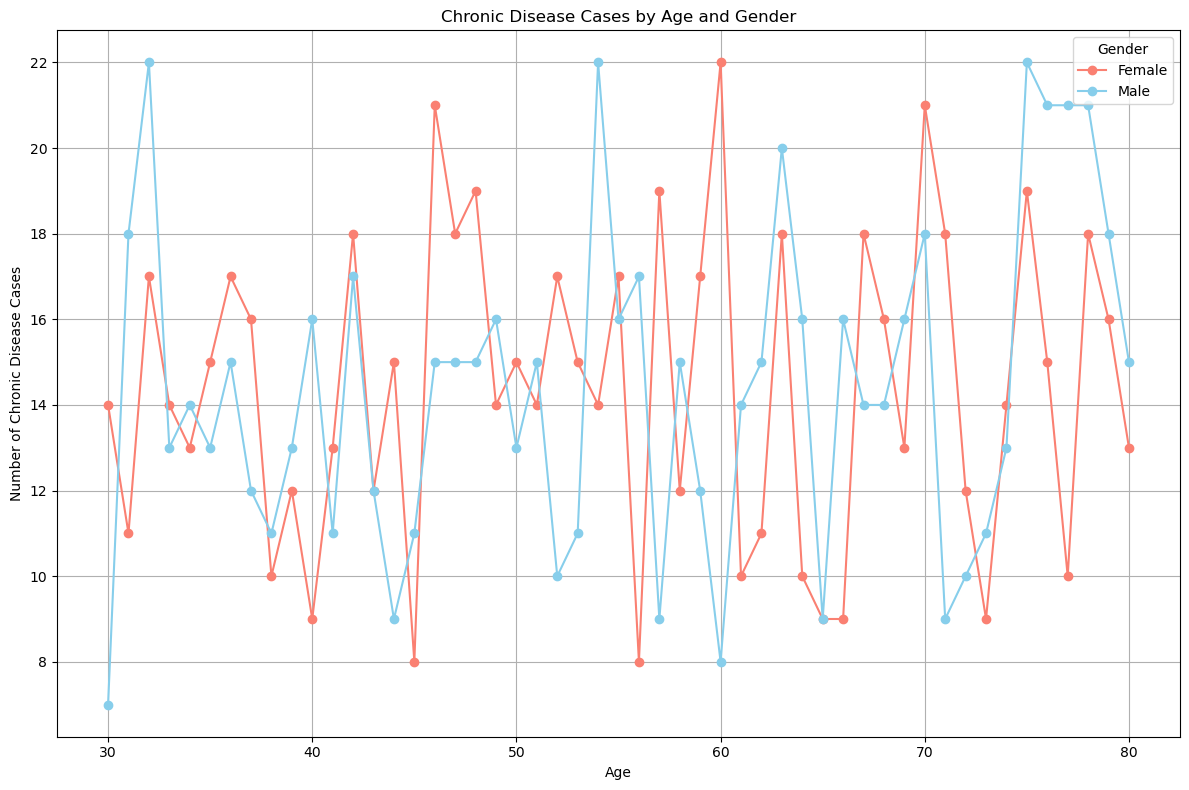

In [ ]:
age_chronic = lung_data.pivot_table(
    index='AGE',
    columns='GENDER',
    values='CHRONIC_DISEASE',
    aggfunc=lambda x : (x == 1).sum()
)

age_chronic.plot(figsize=(12, 8), marker='o', color=['salmon', 'skyblue'])

plt.title('Chronic Disease Cases by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Number of Chronic Disease Cases')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.grid(True)
plt.tight_layout()
plt.show()

### 나이와 폐암 여부에 따른 밀도 분포 시각화
- **그래프 유형**: 커널 밀도 추정(KDE, Kernel Density Estimation)
  - 데이터의 분포를 부드럽게 추정하여 시각화.
- **데이터**:
  - `lung_data`: 폐암 데이터셋.
  - `x='AGE'`: 나이(Age)를 기준으로 밀도 분포를 분석.
  - `hue='LUNG_CANCER'`: 폐암 여부(Yes/No)에 따라 분포를 구분.
  - `fill=True`: 밀도 아래 영역을 색상으로 채워 강조.
- **그래프 설정**:
  - **제목**: `Age Density by Lung Cancer Status` (나이와 폐암 여부에 따른 밀도 분포).
  - **축 제목**:
    - X축: `Age` (나이).
    - Y축: `Density` (밀도).
- **목적**:
  - 나이에 따른 폐암 여부(Yes/No)와 관련된 분포 차이를 시각적으로 확인.
  - 특정 연령대에서 폐암 발생 확률의 밀도 변화 탐구.


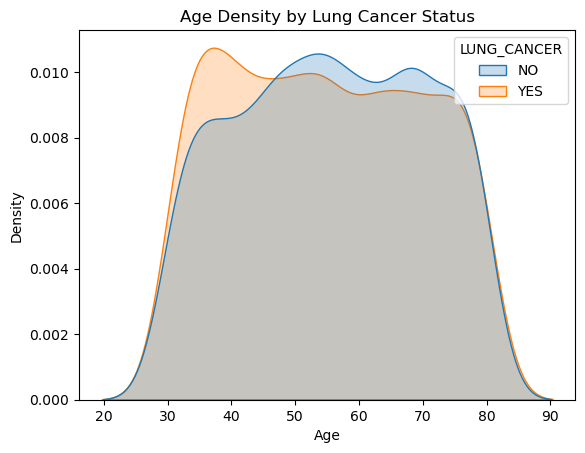

In [ ]:
sns.kdeplot(data=lung_data, x='AGE', hue='LUNG_CANCER', fill=True)
plt.title('Age Density by Lung Cancer Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

### 상관관계 행렬 히트맵 시각화
- **분석 데이터**:
  - `numeric_data`: `lung_data`에서 숫자형 데이터(`float`, `int`)만 선택.
  - `correlation_matrix`: 숫자형 데이터의 **상관관계 행렬**을 계산.
    - 상관계수는 두 변수 간의 관계를 나타냄:
      - **1에 가까울수록**: 강한 양의 상관관계.
      - **-1에 가까울수록**: 강한 음의 상관관계.
      - **0에 가까울수록**: 상관관계가 거의 없음.

- **그래프 설정**:
  - **그래프 유형**: 히트맵(Heatmap).
  - **색상 팔레트**: `Reds` (붉은 계열).
  - **주요 설정**:
    - `annot=True`: 각 셀에 상관계수 값을 표시.
    - `fmt='.2f'`: 소수점 둘째 자리까지 값 표시.
  - **크기**: `(12, 10)`로 설정.
  - **제목**: `Correlation Matrix Heatmap`.

- **목적**:
  - 변수 간의 상관관계를 시각적으로 확인.
  - 강한 상관관계를 가진 변수 쌍을 탐색하여 분석에 활용.

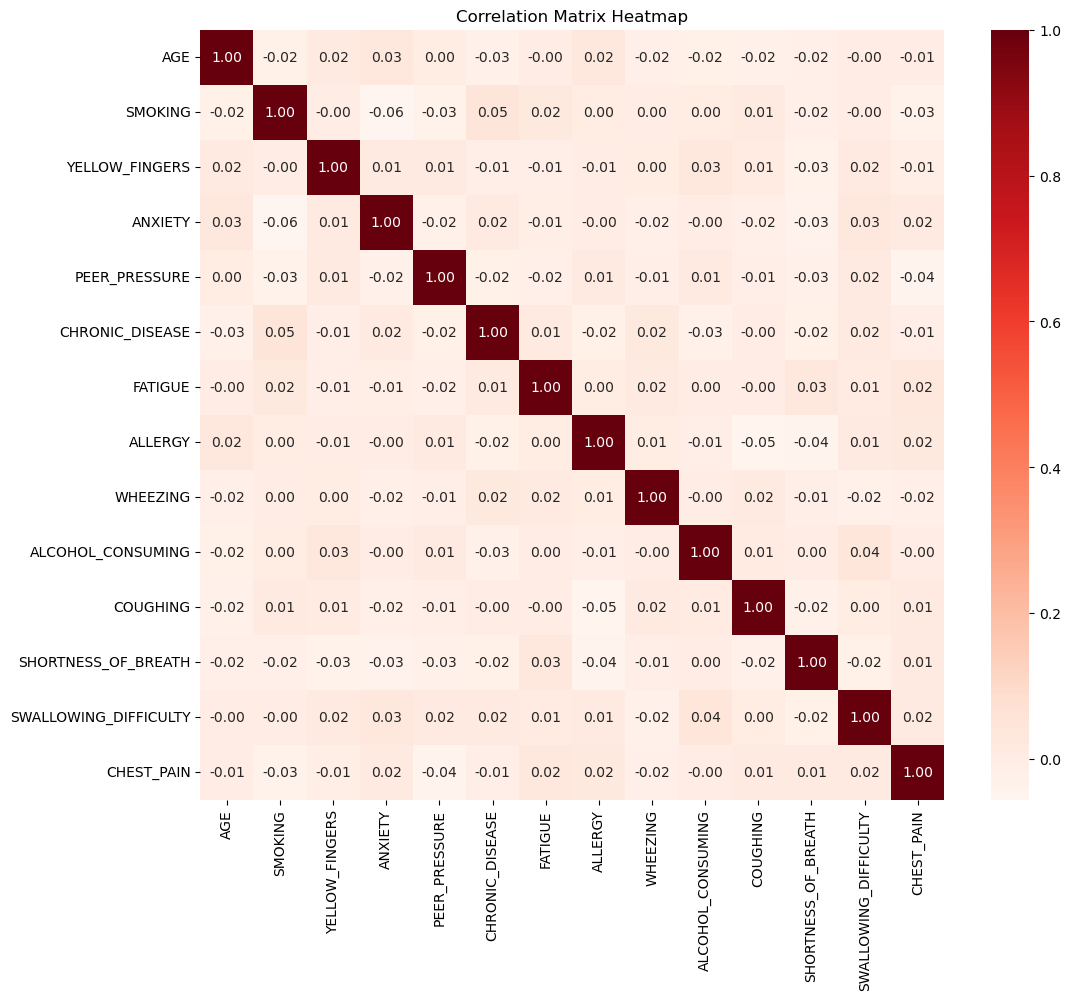

In [ ]:
numeric_data = lung_data.select_dtypes(include=['float', 'int'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


### 머신러닝을 위한 sklearn 라이브러리 호출
- **목적**: 데이터 분석, 전처리, 모델 학습 및 평가를 위해 필요한 라이브러리를 호출합니다.

#### 주요 라이브러리
1. **데이터 분할 및 차원 축소**:
   - `train_test_split`: 데이터셋을 학습용과 테스트용으로 분할.
   - `TSNE`: 차원 축소를 통한 시각화.

2. **데이터 전처리**:
   - `LabelEncoder`: 범주형 데이터를 숫자로 변환.
   - `StandardScaler`: 데이터를 정규화하여 모델 학습 성능 향상.

3. **모델 성능 평가**:
   - `accuracy_score`, `precision_score`, `recall_score`, `f1_score`: 다양한 성능 지표 계산.
   - `classification_report`: 모델 성능 요약.
   - `confusion_matrix`: 실제 값과 예측 값 비교.

4. **머신러닝 모델**:
   - **선형 모델**:
     - `LogisticRegression`: 로지스틱 회귀.
   - **트리 기반 모델**:
     - `DecisionTreeClassifier`: 결정 트리.
     - `RandomForestClassifier`: 랜덤 포레스트.
     - `GradientBoostingClassifier`: 그래디언트 부스팅.
   - **신경망 모델**:
     - `MLPClassifier`: 다층 퍼셉트론 기반 신경망.
   - **서포트 벡터 머신**:
     - `SVC`: 서포트 벡터 머신.

5. **시각화**:
   - `matplotlib.pyplot`: 데이터 및 결과 시각화를 위한 라이브러리.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC

### Gradient Boosting Classifier를 사용한 모델 학습 및 평가
1. **모델 초기화**:
   - `GradientBoostingClassifier(random_state=42)`: 랜덤 시드를 설정하여 재현 가능한 결과를 보장.

2. **모델 학습**:
   - `gb_model.fit(X_train, y_train)`: 학습 데이터(`X_train`, `y_train`)를 사용하여 모델 학습.

3. **예측 수행**:
   - `y_pred = gb_model.predict(X_test)`: 테스트 데이터(`X_test`)를 사용하여 폐암 여부를 예측.

4. **모델 성능 평가**:
   - `classification_report(y_test, y_pred)`:
     - 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1 점수를 포함한 성능 지표를 출력.
   - `confusion_matrix(y_test, y_pred)`:
     - 예측값과 실제값 간의 혼동 행렬을 생성.

5. **혼동 행렬 시각화**:
   - **히트맵(Heatmap)**:
     - `sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')`: 혼동 행렬을 붉은 계열의 히트맵으로 표시.
     - `xticklabels` 및 `yticklabels`: 축 레이블을 "No Cancer", "Cancer"로 설정.
   - **그래프 설정**:
     - 그래프 크기: `(8, 6)`
     - 그래프 제목: `Confusion Matrix: Gradient Boosting Classifier`
     - X축: `Predicted`
     - Y축: `Actual`

6. **목적**:
   - Gradient Boosting Classifier를 사용하여 테스트 데이터의 폐암 여부를 예측.
   - 혼동 행렬을 통해 모델이 올바르게 예측한 경우와 잘못 예측한 경우를 시각적으로 확인.


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.46      0.49       302
           1       0.51      0.56      0.53       298

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600



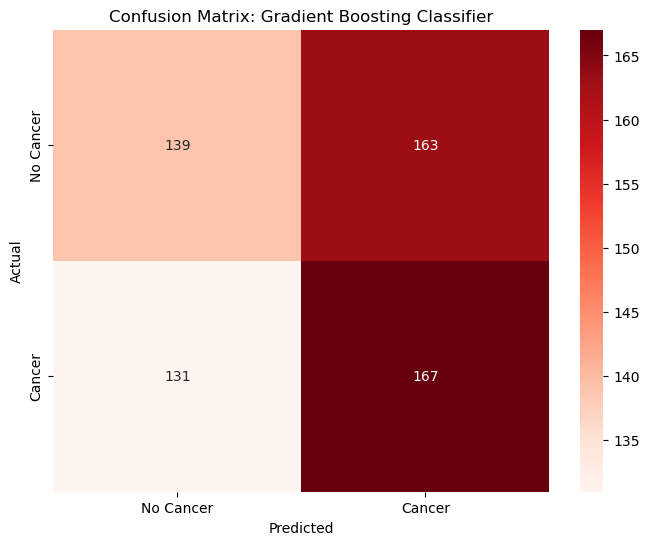

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
plt.title("Confusion Matrix: Gradient Boosting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Neural Network와 t-SNE를 활용한 폐암 데이터 시각화
1. **데이터 전처리**:
   - **원-핫 인코딩**:
     - `pd.get_dummies`: 범주형 데이터를 숫자형으로 변환.
     - 처리된 열: `GENDER`, `SMOKING`, `YELLOW_FINGERS`, `ANXIETY`, `PEER_PRESSURE`, `CHRONIC_DISEASE`,
       `ALCOHOL_CONSUMING`, `COUGHING`, `SHORTNESS_OF_BREATH`, `SWALLOWING_DIFFICULTY`, `CHEST_PAIN`.
   - **특징(X)와 타겟(y) 정의**:
     - `X`: `LUNG_CANCER`를 제외한 모든 열.
     - `y`: `LUNG_CANCER` 열.
   - **데이터 분할**:
     - `train_test_split`: 학습 데이터(80%)와 테스트 데이터(20%)로 분할.
   - **정규화**:
     - `StandardScaler`: 데이터를 정규화하여 신경망의 학습 성능 향상.

2. **신경망 모델 학습**:
   - **모델 정의**:
     - `MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=300, random_state=42)`:
       32개와 16개의 뉴런으로 구성된 2개의 은닉층과 최대 300번 반복.
   - **모델 학습**:
     - `nn_model.fit(X_train, y_train)`: 학습 데이터로 신경망 모델 학습.

3. **t-SNE를 활용한 차원 축소**:
   - **목적**: 고차원 데이터를 2차원으로 축소하여 시각화.
   - `tsne.fit_transform(X_test)`: 테스트 데이터를 2차원으로 변환.

4. **오류 샘플 시각화**:
   - **오류 샘플 강조**:
     - `(y_pred_nn != y_test)`: 신경망이 잘못 예측한 샘플을 필터링.
     - 빨간색 점(`color='red'`)으로 표시하여 시각적으로 구분.
   - **정확히 예측된 데이터**:
     - `y_test == 0`: 폐암이 없는 데이터(파란색).
     - `y_test == 1`: 폐암이 있는 데이터(연한 붉은색).

5. **그래프 설정**:
   - **그래프 제목**: `Lung Cancer Clusters Visualized with Neural Network and t-SNE`.
   - **축 제목**:
     - X축: `t-SNE Component 1`.
     - Y축: `t-SNE Component 2`.
   - **범례**:
     - `No Cancer`: 폐암이 없는 샘플.
     - `Cancer`: 폐암이 있는 샘플.
     - `Misclassified`: 잘못 분류된 샘플.
   - **Alpha 값**: 점의 투명도를 조정하여 겹침을 줄임.

6. **목적**:
   - 신경망 모델의 예측 결과를 시각적으로 확인.
   - t-SNE로 차원 축소한 데이터에서 잘못 분류된 샘플과 올바르게 분류된 샘플의 분포를 비교.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


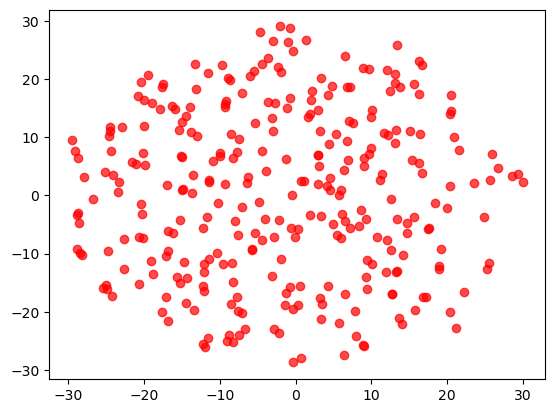

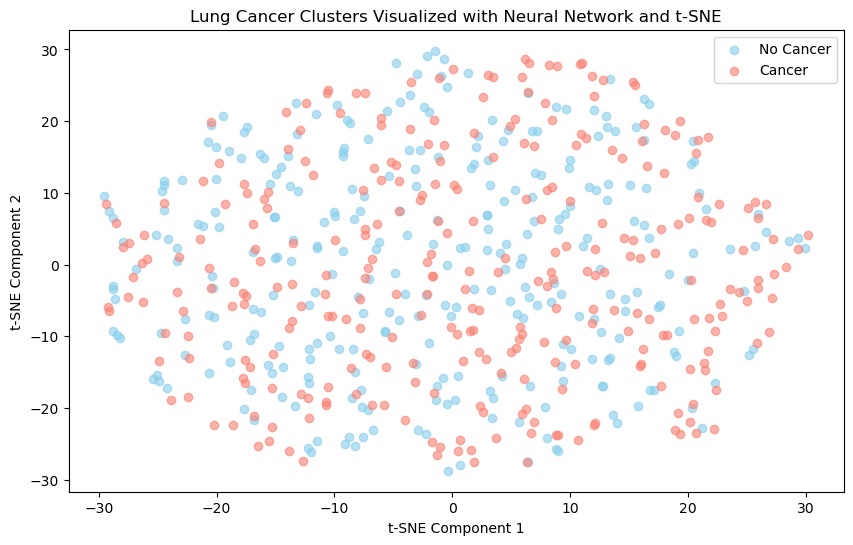

In [ ]:
lung_data_encoded = pd.get_dummies(lung_data, columns=['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                                                       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'ALCOHOL_CONSUMING',
                                                       'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY',
                                                       'CHEST_PAIN'])

X = lung_data_encoded.drop('LUNG_CANCER', axis=1)
y = lung_data_encoded['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nn_model = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_test)

y_test = np.array(y_test)

# 오류 발생
incorrect_predictions = (y_pred_nn != y_test)
plt.scatter(X_reduced[incorrect_predictions, 0], X_reduced[incorrect_predictions, 1],
            color='red', label='Misclassified', alpha=0.7)

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[y_test == 0, 0], X_reduced[y_test == 0, 1], color='skyblue', label='No Cancer', alpha=0.6)
plt.scatter(X_reduced[y_test == 1, 0], X_reduced[y_test == 1, 1], color='salmon', label='Cancer', alpha=0.6)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Lung Cancer Clusters Visualized with Neural Network and t-SNE")
plt.legend()
plt.show()

### 그래프 해석

#### 첫 번째 그래프: 오류 샘플 강조
- **목적**:
  - 모델이 틀리게 예측한 샘플을 시각적으로 강조.
- **의미**:
  - 빨간색 점(`Misclassified`)으로 표시된 샘플은 신경망 모델이 잘못 예측한 테스트 데이터.
  - 이러한 샘플을 확인함으로써 모델의 약점을 분석 가능.

#### 두 번째 그래프: 테스트 데이터 분포 시각화
1. **축 의미 (t-SNE Component 1, 2)**:
   - 그래프의 **X축**과 **Y축**은 원래의 고차원 데이터를 `t-SNE` 알고리즘으로 2차원으로 축소한 결과.
   - `t-SNE`는 데이터 간의 유사성을 유지하려 하므로, 서로 가까운 점들은 고차원 공간에서도 유사한 특징을 가짐.

2. **점의 색상**:
   - `skyblue`: 폐암이 없는 샘플(No Cancer).
   - `salmon`: 폐암이 있는 샘플(Cancer).

3. **그래프의 각 점**:
   - 테스트 데이터의 각 샘플을 나타냄.
   - 같은 클래스(폐암 여부)가 가까이 군집한다면, 신경망이 데이터를 잘 학습한 것.
   - 다른 클래스가 섞여 있다면, 모델이 데이터를 분류하기 어려운 특징이 있음.

4. **결론**:
   - 위 그래프에서는 데이터 간의 분류가 명확하지 않음.
   - 이를 개선하기 위해 **추가적인 데이터 전처리** 또는 **모델 튜닝**이 필요.


---

### 여러 머신러닝 모델 성능 비교

#### 1. 데이터 전처리
- **범주형 데이터 인코딩**:
  - `LabelEncoder`: `object` 타입(범주형 데이터)을 숫자로 변환.
  - 각 열을 `LabelEncoder`로 변환하여 모델 학습에 사용할 수 있도록 전처리.
- **특징(X)와 타겟(y) 정의**:
  - `X`: `LUNG_CANCER`를 제외한 모든 열.
  - `y`: `LUNG_CANCER` 열(폐암 여부).
- **데이터 분할**:
  - `train_test_split`: 학습 데이터(80%)와 테스트 데이터(20%)로 분할.


#### 2. 머신러닝 모델 정의
- **모델 리스트**:
  - `Logistic Regression`: 로지스틱 회귀.
  - `Decision Tree`: 결정 트리.
  - `Random Forest`: 랜덤 포레스트.
  - `SVM`: 서포트 벡터 머신.


#### 3. 모델 학습 및 평가
- **학습 및 예측**:
  - 각 모델을 학습 데이터(`X_train`, `y_train`)로 학습.
  - 테스트 데이터(`X_test`)를 사용하여 예측(`y_pred`) 수행.
- **평가 지표**:
  - **Accuracy**: 정확도.
  - **Precision**: 정밀도.
  - **Recall**: 재현율.
  - **F1 Score**: 정밀도와 재현율의 조화 평균.
  - 각 모델의 평가 결과를 `results` 리스트에 저장.


#### 4. 결과 정리 및 출력
- **결과 테이블**:
  - `results_df`: 각 모델의 성능 지표를 저장한 데이터프레임.
  - `IPython.display.display`: Jupyter Notebook에서 성능 비교 표를 출력.


#### 5. 성능 시각화
- **그래프 설정**:
  - 그래프 유형: 막대 그래프(Bar Plot).
  - X축: 모델 이름.
  - Y축: 각 성능 지표(`Accuracy`, `Precision`, `Recall`, `F1 Score`).
  - 색상: `['salmon', 'skyblue', 'limegreen', 'orange']`로 각 모델 구분.
- **목적**:
  - 각 모델의 성능 지표를 시각적으로 비교하여 최적의 모델을 선택.


#### 6. 목적
- 여러 머신러닝 모델의 성능(정확도, 정밀도, 재현율, F1 점수)을 비교하여 폐암 데이터에 가장 적합한 모델을 선택.


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.520000,0.515244,0.567114,0.539936
1,Decision Tree,0.488333,0.485246,0.496644,0.490879
2,Random Forest,0.481667,0.479233,0.503356,0.490998
3,SVM,0.506667,0.502778,0.607383,0.550152


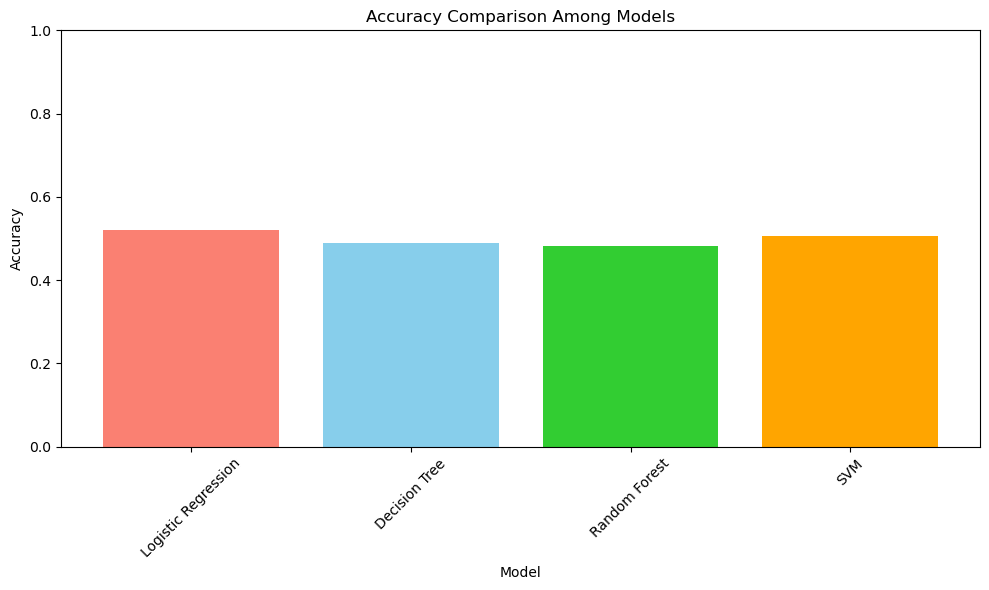

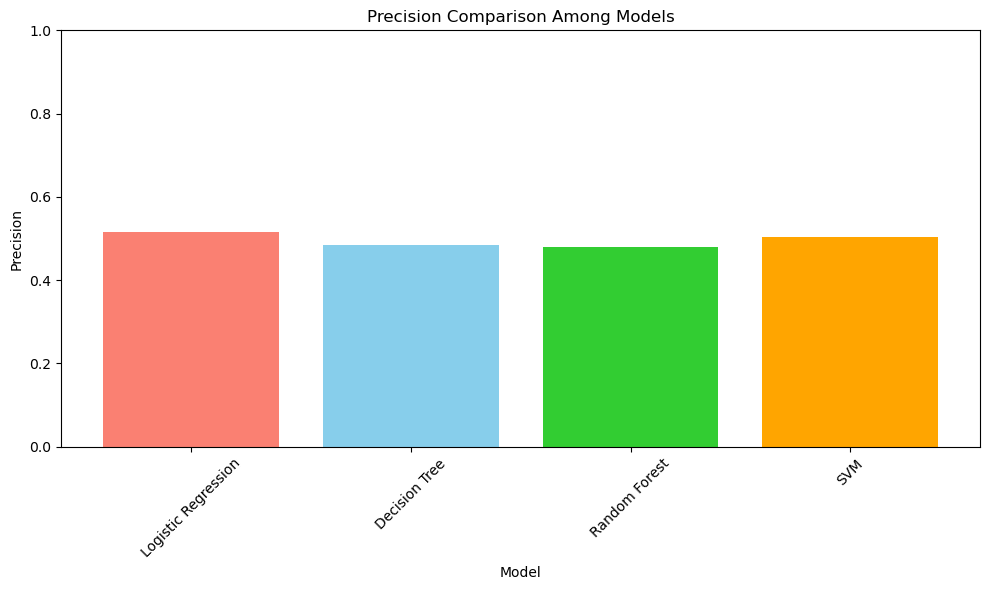

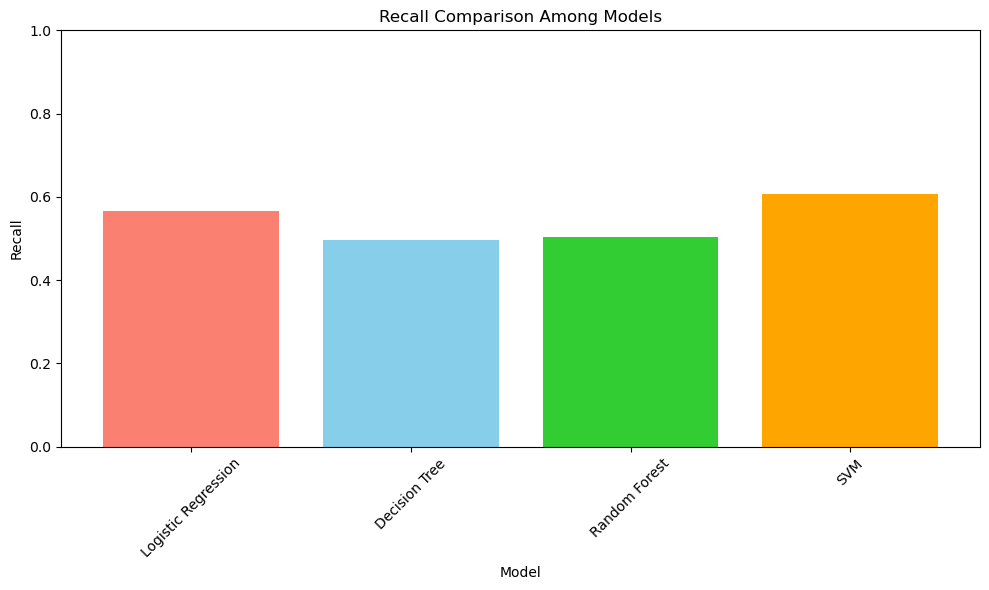

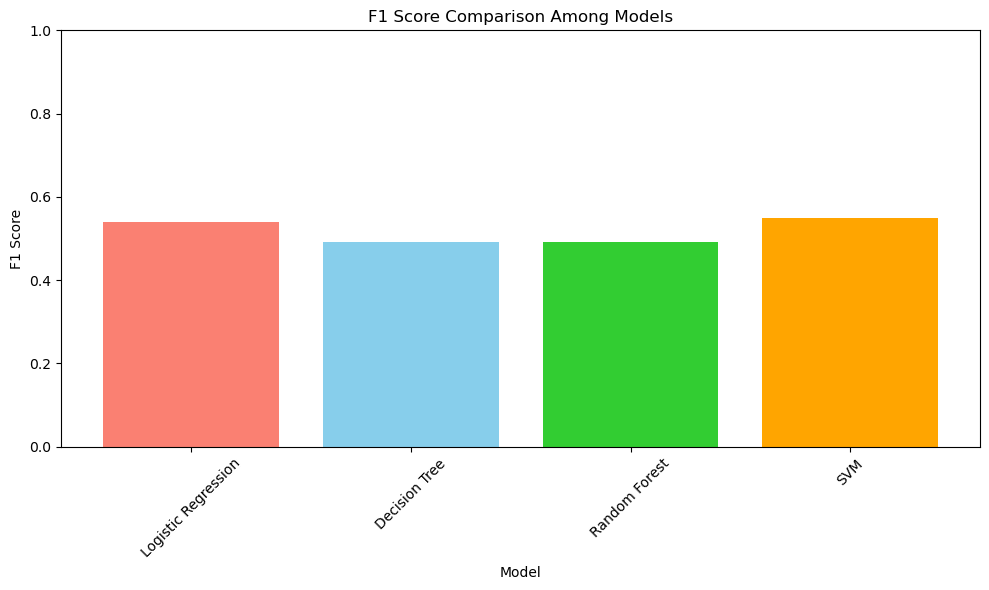

In [ ]:
label_encoders = {}
for column in lung_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    lung_data[column] = le.fit_transform(lung_data[column])
    label_encoders[column] = le

X = lung_data.drop(columns='LUNG_CANCER')
y = lung_data['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

results_df = pd.DataFrame(results)

from IPython.display import display

display(results_df)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Model'], results_df[metric], color=['salmon', 'skyblue', 'limegreen', 'orange'])
    plt.title(f'{metric} Comparison Among Models')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 그래프 설명

- **목적**:
  - 그래프는 각각의 머신러닝 모델에 대해 **Accuracy**, **Precision**, **Recall**, **F1 Score**의 값을 비교.
  - 각 모델의 성능을 한눈에 확인하고 비교하기 쉽게 시각적으로 표현.

- **그래프의 구성**:
  1. **X축**:
     - 머신러닝 모델 이름 (`Logistic Regression`, `Decision Tree`, `Random Forest`, `SVM`).
  2. **Y축**:
     - 각 성능 지표의 값 (`Accuracy`, `Precision`, `Recall`, `F1 Score`), 값 범위: 0 ~ 1.
  3. **그래프 유형**:
     - 막대 그래프(Bar Plot).

- **색상에 따른 모델**:
  - **빨간색**: Logistic Regression.
  - **파란색**: Decision Tree.
  - **초록색**: Random Forest.
  - **노란색**: SVM.

- **결론**:
  - 이 그래프를 통해 각 성능 지표별로 어떤 모델이 더 나은 성능을 보이는지 비교 가능.
  - 모델 선택 시 성능 지표 우선순위에 따라 적합한 모델을 결정할 수 있음.
